## <font color=blue >MC-ANN demo.
This notebook demos how to train the MC-ANN model on the tsv dataset files of ***Stevens Creek*** and ***Coyote*** reservoir sensors. If you want to run it on other sensors, just change the parameter of ***--stream_sensor*** and ***--rain_sensor***.

In our dataset, the parameters should be set to:

reservoir Almaden:
--stream_sensor **reservoir_stor_4001_sof24** 

reservoir Coyote:
--stream_sensor **reservoir_stor_4005_sof24** 

reservoir Lexington:
--stream_sensor **reservoir_stor_4007_sof24** 

reservoir Stevens Creek:
--stream_sensor **reservoir_stor_4009_sof24** 
    
reservoir Vasona:
--stream_sensor **reservoir_stor_4011_sof24** 
  
If you want to train a multivariate model, you should also set the parameter --watershed to 1, and set --rain_sensor to the file name of the rain/stream sensor without ".tsv"

## <font color=blue >Parameter setting. 

--**stream_sensor**: stream dataset file name. The file should be csv file.

--**rain_sensor**: rain dataset file name. The file should be csv file.

--**train_volume**: train set size.

--**hidden_dim**: hidden dim of lstm layers.

--**atten_dim**: hidden dim of attention layers.

--**layer**: number of layers.
    
--**os_s**: oversampling steps.

--**os_v**: oversampling frequency.

--**oversampling**: ratio of training data with extreme points.
    
--**watershed**: 1 if trained with rain info, else 0.

--**model**: model name, used to generate the pt file and predicted file names.

--**mode**: set it to 'train' or 'inference' with an existing pt_file.

--**pt_file**: if set, the model will be loaded from this pt file, otherwise check the file according to the assigned parameters.

--**save**: if save the predicted file of testset, set to 1, else 0.

--**outf**: default value is './output', the model will be saved in the train folder in this directory.

## <font color=blue >Train a *uni-variate* model without rain data.

In [ ]:
!python run.py \
  --train_volume 30000 \
  --hidden_dim 512 \
  --atten_dim 600 \
  --layer 1 \
  --stream_sensor reservoir_stor_4009_sof24 \
  --rain_sensor reservoir_stor_4009_sof24 \
  --watershed 0 \
  --os_s 18 \
  --os_v 4 \
  --seq_weight 0.4 \
  --oversampling 40 \
  --input_len 360 \
  --output_len 72 \
  --model  Stevens_Creek

## <font color=blue >Load a trained single-variate model.

In [ ]:
import numpy as np
import random
import imp
from utils.utils2 import *
from run import Options
from models.Group_GMM5 import *
pt = './output/Stevens_Creek/train/Stevens_Creek.zip'
# get model
model = Options().get_model(pt)

## <font color=blue >Use test_single to do inferencing on one time-point.

test_point is:  2018-12-16 13:30:00
RMSE:  2.1783353980387554
MAPE:  0.002556754398399504


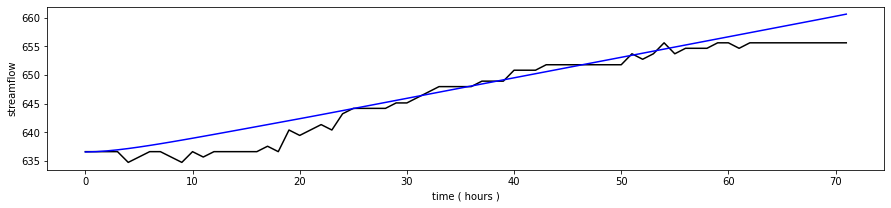

In [3]:
import numpy as np
from utils.utils2 import *
testP=["2018-12-16 13:30:00"] 
predicted, ground_truth = model.test_single(testP[0])
print("RMSE: ", RMSE(predicted, ground_truth))
print("MAPE: ", MAPE(predicted, ground_truth))
plot(ground_truth, predicted)

## <font color=blue >Inferencing for real-world application.
If you already have test time point, history stream input and rain data input prepared, use ***predict*** function to do it.

In [ ]:
import numpy as np
import random
from utils.utils2 import *
from run import Options
from models.Group_GMM5 import *
from models.Inference import *
opt = Options().parse()
# model name
pt = './output/Stevens_Creek/train/Stevens_Creek.zip'
# get model
model = Options().get_model(pt)
# get data
testP=["2020-02-16 00:30:00"]   
for i in range(len(testP)):
    stream_data, indicator_data, pre_gt = model.get_data(testP[i])  
    p = model.predict(testP[i], stream_data, indicator_data, pre_gt)
    print("Predicted data: ")
    print(p)

## <font color=blue >Train a *multi-variate* model with rain data.

In [ ]:
!python run.py \
  --train_volume 30000 \
  --hidden_dim 512 \
  --atten_dim 600 \
  --layer 1 \
  --epochs 40 \
  --stream_sensor reservoir_stor_4005_sof24 \
  --rain_sensor raingauge_byhour_6017_sof \
  --watershed 1 \
  --os_s 18 \
  --os_v 4 \
  --seq_weight 0.4 \
  --oversampling 40 \
  --input_len 360 \
  --output_len 72 \
  --model  Coyote_with_Rain

## <font color=blue >Load a trained multi-variate model.

In [ ]:
import numpy as np
import random
import imp
from utils.utils2 import *
from run import Options
from models.Group_GMM5 import *
pt = './output/Coyote_with_Rain/train/Coyote_with_Rain.zip'
# get model
model = Options().get_model(pt)

## <font color=blue >Use test_single to do inferencing on one time-point.

RMSE:  29.030456707549465
MAPE:  0.0033207333989823226


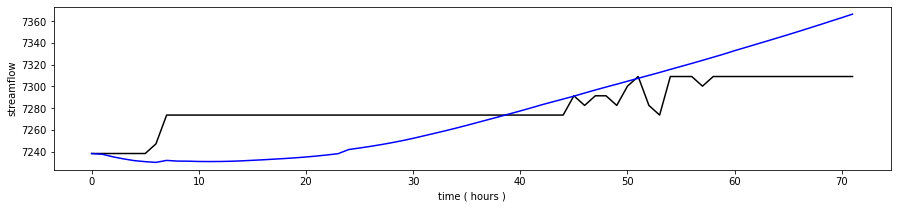

In [54]:
import numpy as np
from utils.utils2 import *
testP=["2018-12-19 10:30:00"] 
predicted, ground_truth = model.test_single(testP[0])
print("RMSE: ", RMSE(predicted, ground_truth))
print("MAPE: ", MAPE(predicted, ground_truth))
plot(ground_truth, predicted)